<a href="https://colab.research.google.com/github/wonyoung-ji/asiae_edu/blob/master/fintech/200917_%EB%84%A4%EC%9D%B4%EB%B2%84_DataLab_%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __네이버 데이터랩에서 검색어 트렌드 분석__
  - 검색어 트렌드 분석을 통해 검색어 증가에 따른 주가변동을 분석한다.
  - 마케팅 효과에 따른 검색어 증가량의 변동을 분석한다.
  - 검색어 증가를 통해 마케팅의 수명은 어느정도인지 관리한다.
  - 경쟁사의 검색어 데이터를 통해 경쟁사 마케팅의 파급효과를 분석한다.
  - reference: https://developers.naver.com/docs/datalab/search/#python

# 1.라이브러리 설치

In [ ]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144600 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

mpl.rcParams['axes.unicode_minus'] = False

# 2.네이버 데이터랩 API활용 예시
  - 네이버 데이터랩에서 기생충 검색량을 가져와 시각화해본다.

### 2.1. 기생충, 반도의 검색량 추출

In [ ]:
nid= '52vIBt7gRjMAHREje_XB'
nkey= 'BNbzV6Ygv6'

- 네이버 디벨로퍼스에서 어플리케이션을 제출후 id와 key를 받아온다

In [ ]:
import json
import os
import sys
import urllib.request

client_id = nid
client_secret = nkey 
url = "https://openapi.naver.com/v1/datalab/search";
#body = "{\"startDate\":\"2017-01-01\",\"endDate\":\"2017-04-30\",\"timeUnit\":\"month\",\"keywordGroups\":[{\"groupName\":\"한글\",\"keywords\":[\"한글\",\"korean\"]},{\"groupName\":\"영어\",\"keywords\":[\"영어\",\"english\"]}],\"device\":\"pc\",\"ages\":[\"1\",\"2\"],\"gender\":\"f\"}"
body="""{
    "startDate":"2019-01-01",
    "endDate":"2020-08-30",
    "timeUnit":"month",
    "keywordGroups":[
          {"groupName":"기생충","keywords":["기생충","봉준호","짜파구리","CJ ENM"]},
          {"groupName":"반도","keywords":["반도","CJ ENM"]}
    ]
    }"""
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()

if (rescode==200):
    response_body = response.read()
    res=response_body.decode('utf-8')
    print(res)
else:
    print("Error Code:" + rescode)

{"startDate":"2019-01-01","endDate":"2020-08-31","timeUnit":"month","results":[{"title":"기생충","keywords":["기생충","봉준호","짜파구리","CJ ENM"],"data":[{"period":"2019-01-01","ratio":0.99682},{"period":"2019-02-01","ratio":1.23235},{"period":"2019-03-01","ratio":1.03002},{"period":"2019-04-01","ratio":7.92022},{"period":"2019-05-01","ratio":46.82542},{"period":"2019-06-01","ratio":59.07226},{"period":"2019-07-01","ratio":11.90921},{"period":"2019-08-01","ratio":12.20851},{"period":"2019-09-01","ratio":4.86102},{"period":"2019-10-01","ratio":3.7481},{"period":"2019-11-01","ratio":5.34911},{"period":"2019-12-01","ratio":5.05451},{"period":"2020-01-01","ratio":20.11018},{"period":"2020-02-01","ratio":100},{"period":"2020-03-01","ratio":9.47802},{"period":"2020-04-01","ratio":5.92012},{"period":"2020-05-01","ratio":4.90204},{"period":"2020-06-01","ratio":4.35607},{"period":"2020-07-01","ratio":4.52975},{"period":"2020-08-01","ratio":4.40892}]},{"title":"반도","keywords":["반도","CJ ENM"],"data":[{"peri

- 기생충외에도 반도를 키워드로 지정했다. 기생충과 반도 두 개의 그룹으로 데이터가 나온다.
- 이를 json을 사용해 정리해본다.

In [ ]:
jdata=json.loads(res)
jdata

{'endDate': '2020-08-31',
 'results': [{'data': [{'period': '2019-01-01', 'ratio': 0.99682},
    {'period': '2019-02-01', 'ratio': 1.23235},
    {'period': '2019-03-01', 'ratio': 1.03002},
    {'period': '2019-04-01', 'ratio': 7.92022},
    {'period': '2019-05-01', 'ratio': 46.82542},
    {'period': '2019-06-01', 'ratio': 59.07226},
    {'period': '2019-07-01', 'ratio': 11.90921},
    {'period': '2019-08-01', 'ratio': 12.20851},
    {'period': '2019-09-01', 'ratio': 4.86102},
    {'period': '2019-10-01', 'ratio': 3.7481},
    {'period': '2019-11-01', 'ratio': 5.34911},
    {'period': '2019-12-01', 'ratio': 5.05451},
    {'period': '2020-01-01', 'ratio': 20.11018},
    {'period': '2020-02-01', 'ratio': 100},
    {'period': '2020-03-01', 'ratio': 9.47802},
    {'period': '2020-04-01', 'ratio': 5.92012},
    {'period': '2020-05-01', 'ratio': 4.90204},
    {'period': '2020-06-01', 'ratio': 4.35607},
    {'period': '2020-07-01', 'ratio': 4.52975},
    {'period': '2020-08-01', 'ratio': 4.408

In [ ]:
len(jdata['results'])

2

- results안에, 기생충과 반도 두 개의 그룹으로 data가 이루어져 있다. 
- results의 길이를 보면 당연히 2개로 나온다.
- jdata['results'][0]은 기생충을, jdata['results'][1]은 반도를 받는다.

## 2.2. 기생충 검색량 시각화
- 기생충의 데이터만 가져와 line plot으로 보여준다

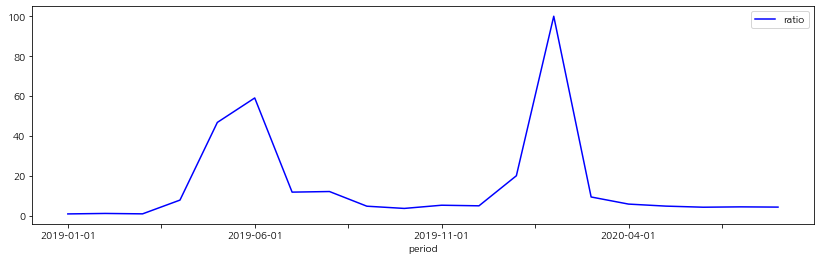

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt

jdata=json.loads(res)
pdata=jdata['results'][0]['data']
cjdf = pd.DataFrame.from_dict(pdata)


plt.rcParams["figure.figsize"] = (14,4)
cjdf.plot(kind='line', x='period', y='ratio', color='Blue')
plt.legend()
plt.show()

# 3.네이버 데이터랩 검색량 추출
- 네이버 데이터랩 검색량을 추출하는 함수를 정의한다.
- 함수에 키워드, 날짜, 날짜간격을 입력한다. 

## 3.1. body 만드는 함수 정의

In [ ]:
def makeQry(keywords=[],sday='2019-01-01',eday='2020-08-30',tunit='date'):
  res=[]
  for words in keywords:
    dict = {'groupName':words[0],'keywords':words}
    res.append(dict)
  rdict = {"startDate":sday,
    "endDate":eday,
    "timeUnit":tunit,
    "keywordGroups":res
    }
  return json.dumps(rdict,ensure_ascii=False)         #  Python의 객체를 JSON 문자열로 변환

In [ ]:
keywords = [['극한직업'],['사바하'],['걸캅스'],['나쁜녀석들'],['기생충','봉준호','짜파구리']]
makeQry(keywords,'2019-01-01','2020-08-30','date')

'{"startDate": "2019-01-01", "endDate": "2020-08-30", "timeUnit": "date", "keywordGroups": [{"groupName": "극한직업", "keywords": ["극한직업"]}, {"groupName": "사바하", "keywords": ["사바하"]}, {"groupName": "걸캅스", "keywords": ["걸캅스"]}, {"groupName": "나쁜녀석들", "keywords": ["나쁜녀석들"]}, {"groupName": "기생충", "keywords": ["기생충", "봉준호", "짜파구리"]}]}'

## 3.2. 검색량 불러오는 함수 정의
  - 위에서 만든 body 추출 함수를 사용하여 raw data를 가져오는 Mysearch 함수를 정의한다.

In [ ]:
def Mysearch(keywords=[], sday='2019-01-01',eday='2020-08-30',tunit='date'):
  client_id = nid
  client_secret = nkey 
  url = "https://openapi.naver.com/v1/datalab/search";
 
  body= makeQry(keywords,sday,eday,tunit)
  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id",client_id)
  request.add_header("X-Naver-Client-Secret",client_secret)
  request.add_header("Content-Type","application/json")
  response = urllib.request.urlopen(request, data=body.encode("utf-8"))
  rescode = response.getcode()

  if (rescode==200):
    response_body = response.read()
    res=response_body.decode('utf-8')
    # print(res)
  else:
    res='error'
    print("Error Code:" + rescode)
  return res

## 3.3 검색량 시각화
  - 위에서 만든 Mysearch 함수를 사용하여 검색량을 추출해본다.
  - 같은 기간 안의 《극한직업》,《사바하》,《걸캅스》,《나쁜녀석들》,《기생충》,《백두산》의 검색량을 분석한다.


               극한직업      사바하      걸캅스    나쁜녀석들      기생충
period                                                 
2019-01-01  0.09183  0.00673  0.00210  0.02806  0.02828
2019-01-02  0.10569  0.00654  0.00242  0.02547  0.03213
2019-01-03  0.10303  0.00514  0.00175  0.02032  0.03046
2019-01-04  0.91302  0.00493  0.00277  0.02230  0.02736
2019-01-05  0.20280  0.00591  0.00232  0.02552  0.04605


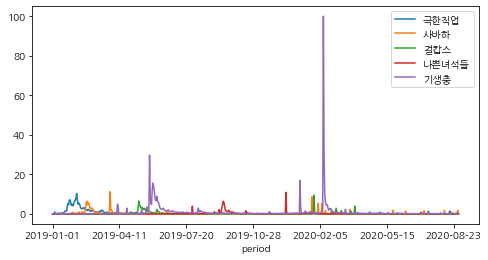

In [ ]:
keywords = [['극한직업'],['사바하'],['걸캅스'],['나쁜녀석들'],['기생충','봉준호','짜파구리']]
res = Mysearch(keywords,sday='2019-01-01',eday='2020-08-30',tunit='date')
jdata = json.loads(res)

i = 0
maindf = pd.DataFrame()
for words in keywords:
  pdata = jdata['results'][i]['data']
  df = pd.DataFrame.from_dict(pdata)
  df.columns=['period',words[0]]
  df = df.set_index('period')
  maindf = pd.merge(maindf,df,how='outer',left_index=True,right_index=True)
  i+=1

print(maindf.head())
plt.rcParams["figure.figsize"] = (8,4)
maindf.plot()

- 기생충 값이 미친듯 하다..
- 기생충의 파급력은 각설하고, 나머지 애들만 비교해보도록 한다.

               극한직업      사바하      걸캅스    나쁜녀석들      백두산
period                                                 
2019-01-01  0.51273  0.03758  0.01178  0.15669  0.14547
2019-01-02  0.59014  0.03655  0.01355  0.14220  0.11658
2019-01-03  0.57528  0.02870  0.00981  0.11350  0.10892
2019-01-04  5.09767  0.02758  0.01552  0.12453  0.10172
2019-01-05  1.13232  0.03300  0.01299  0.14248  0.08695


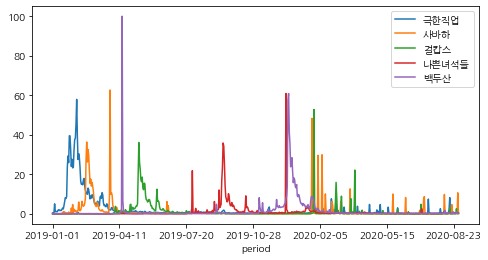

In [ ]:
keywords = [['극한직업'],['사바하'],['걸캅스'],['나쁜녀석들'],['백두산']]
res = Mysearch(keywords,sday='2019-01-01',eday='2020-08-30',tunit='date')
jdata = json.loads(res)

i = 0
maindf = pd.DataFrame()
for words in keywords:
  pdata = jdata['results'][i]['data']
  df = pd.DataFrame.from_dict(pdata)
  df.columns=['period',words[0]]
  df = df.set_index('period')
  maindf = pd.merge(maindf,df,how='outer',left_index=True,right_index=True)
  i+=1

print(maindf.head())
plt.rcParams["figure.figsize"] = (8,4)
maindf.plot()

## 3.4. 다중 키워드 함수 정의
  - 위에서 시각화한 함수를 MyDataLab로 정의한다.

In [ ]:
def MyDataLab(keywords,sday='2019-01-01',eday='2020-08-30',tunit='date'):
  res = Mysearch(keywords,sday='2019-01-01',eday='2020-08-30',tunit='date')
  jdata = json.loads(res)
  i = 0
  maindf = pd.DataFrame()
  for words in keywords:
    pdata = jdata['results'][i]['data']
    df = pd.DataFrame.from_dict(pdata)
    df.columns=['period',words[0]]
    df = df.set_index('period')
    maindf = pd.merge(maindf,df,how='outer',left_index=True,right_index=True)
    i+=1
  return maindf


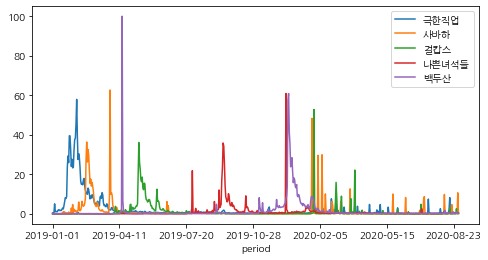

In [ ]:
keywords = [['극한직업'],['사바하'],['걸캅스'],['나쁜녀석들'],['백두산']]
mdf = MyDataLab(keywords,'2019-01-01','2020-08-30','date')
mdf.plot()
plt.show()